# **IMPORTING LIBRARIES**

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# **LOADING THE DATASET**

In [15]:
credit_data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **EXPLORATORY DATA ANALYSIS**

***Class Distribution***

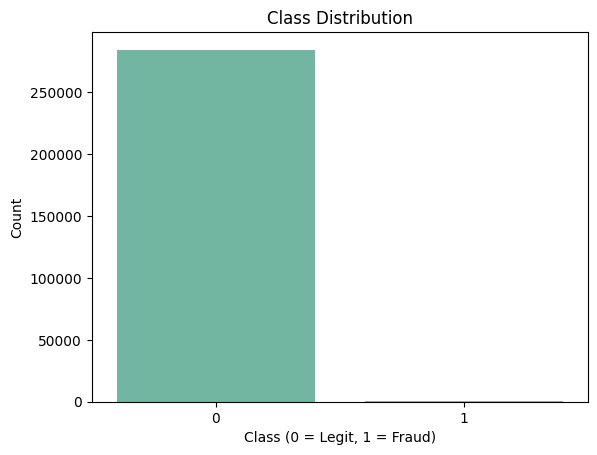

In [16]:
sns.countplot(data=credit_data, x='Class', palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

***Statistical Summary***

In [17]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


***Information***

In [18]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

***Null Value Check***

In [19]:
credit_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


***Distribution of Each Feature (Sample)***

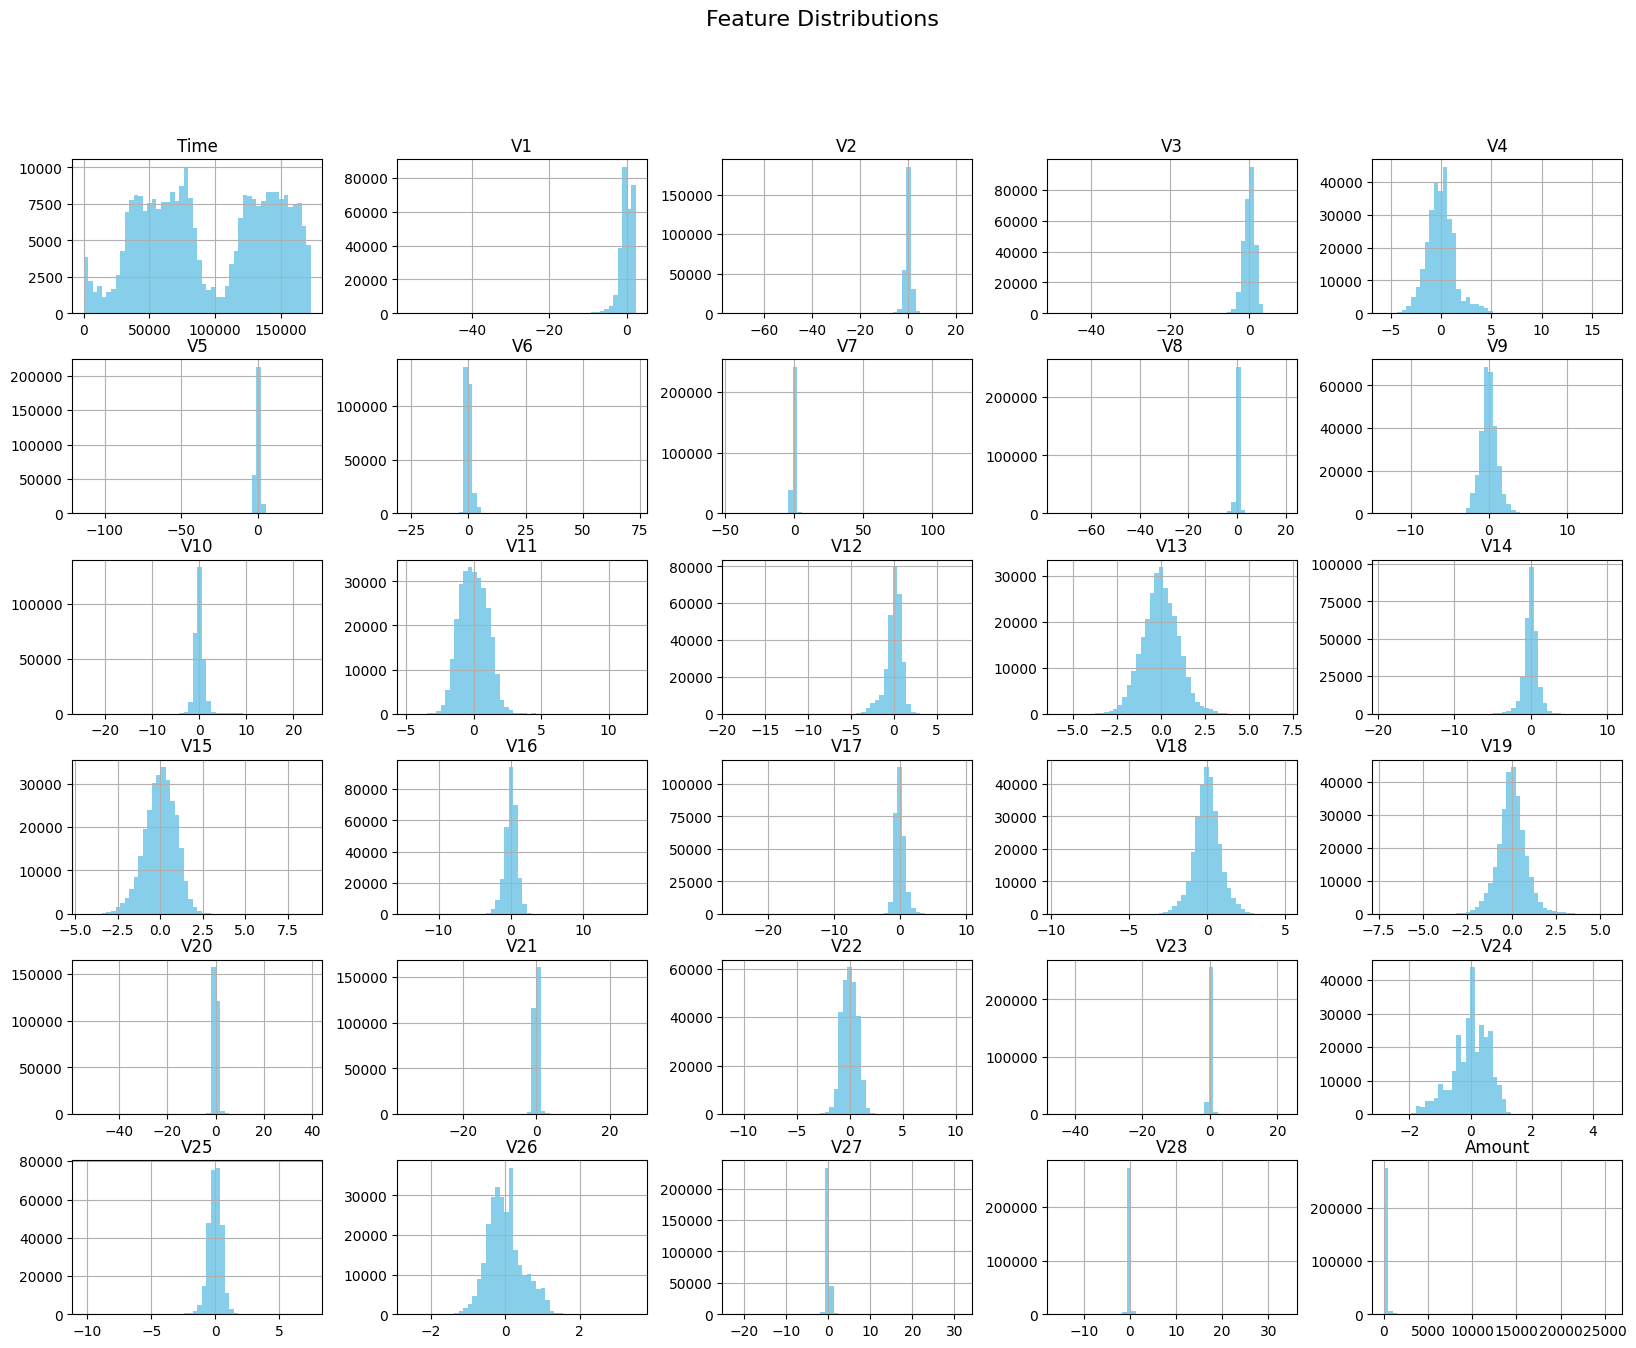

In [20]:
credit_data.drop('Class', axis=1).hist(figsize=(20, 15), bins=50, color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# **DATA PREPROCESSING**

***Feature Scaling***

In [21]:
scaler = StandardScaler()
credit_data['NormalizedAmount'] = scaler.fit_transform(credit_data[['Amount']])
credit_data.drop(['Amount', 'Time'], axis=1, inplace=True)

***Correlation Heatmap***

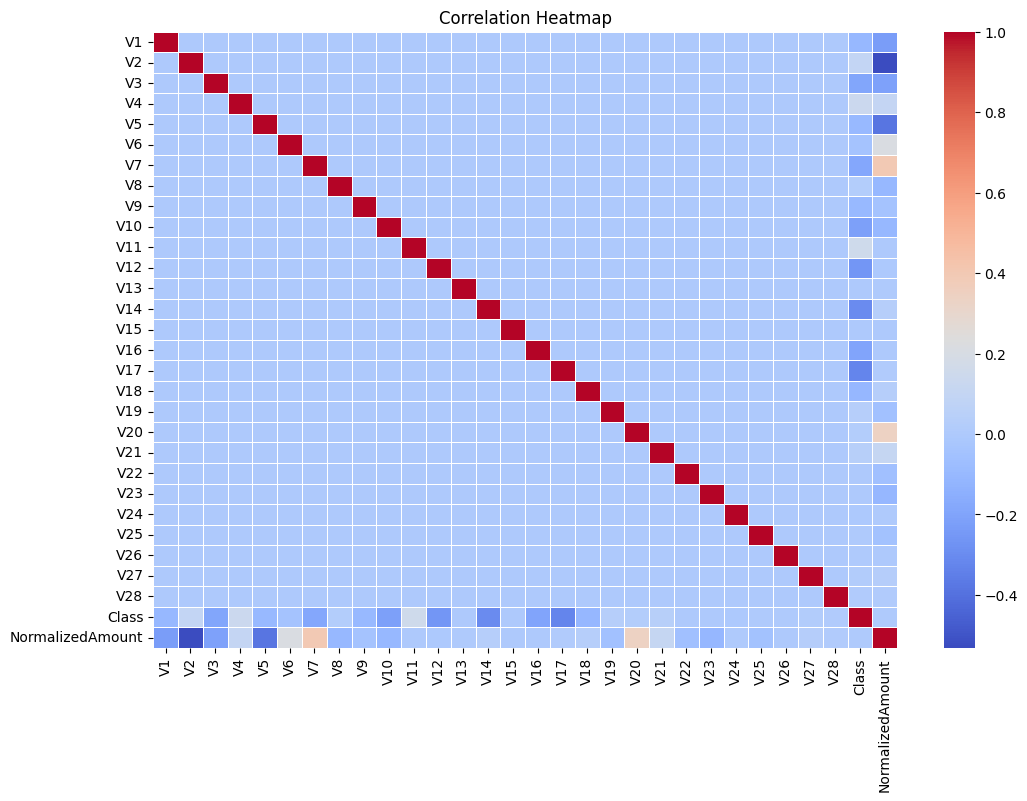

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(credit_data.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **HANDLING CLASS IMBALANCE**

In [23]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **MODEL TRAINING**

In [24]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.139983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994


# **MODEL EVALUATION**

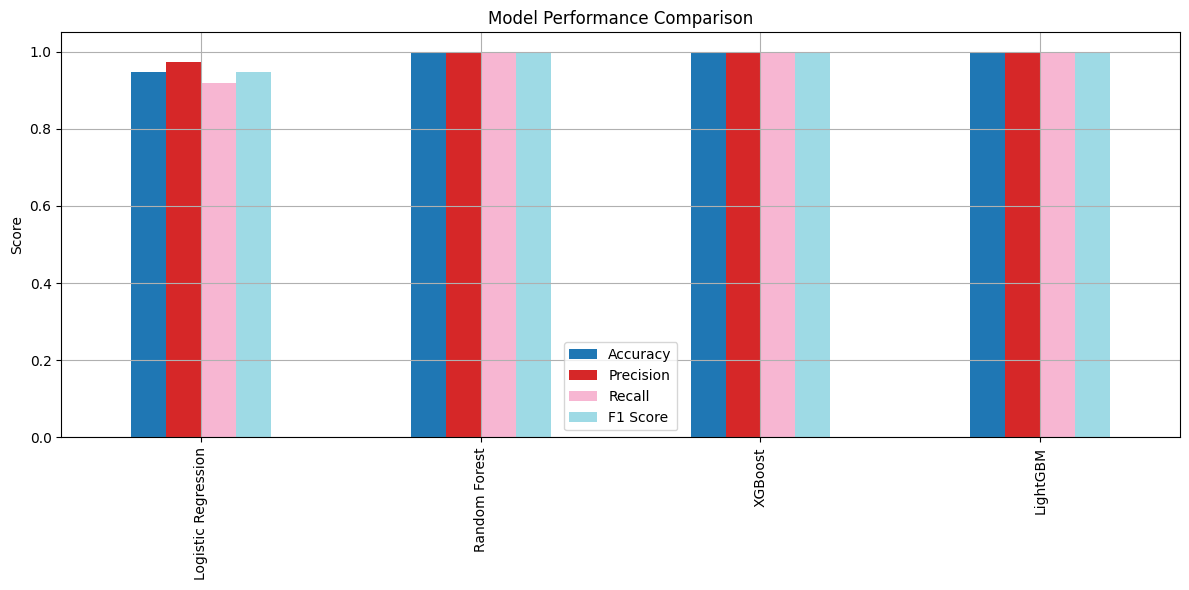

In [25]:
pd.DataFrame(results).T.plot(kind='bar', figsize=(12, 6), colormap='tab20')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# **BEST MODEL EVALUATION (XGBOOST)**

***ROC Curve***

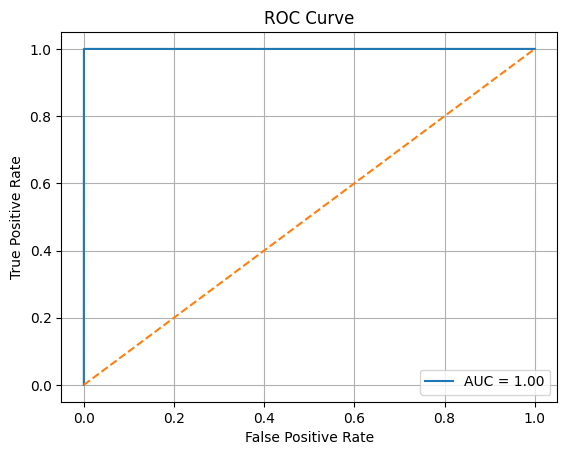

In [26]:
best_model = models['XGBoost']
y_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

***Precision-Recall Curve***

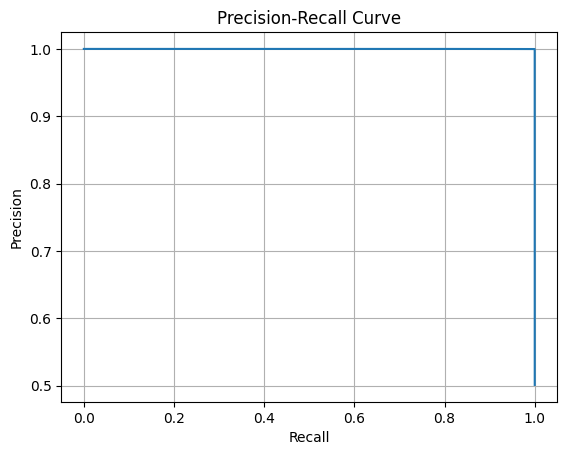

In [27]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

***Confusion Matrix***

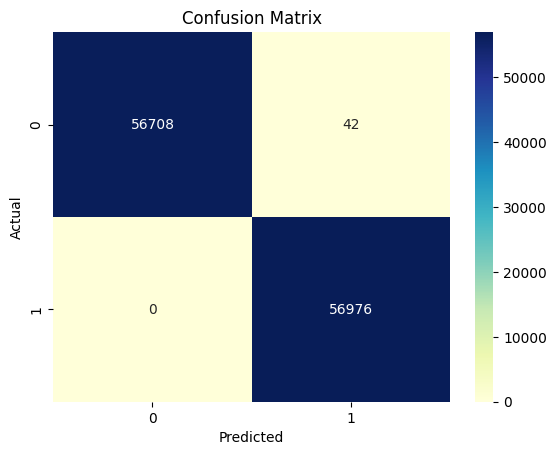

In [28]:
cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **FEATURE IMPORTANCE**

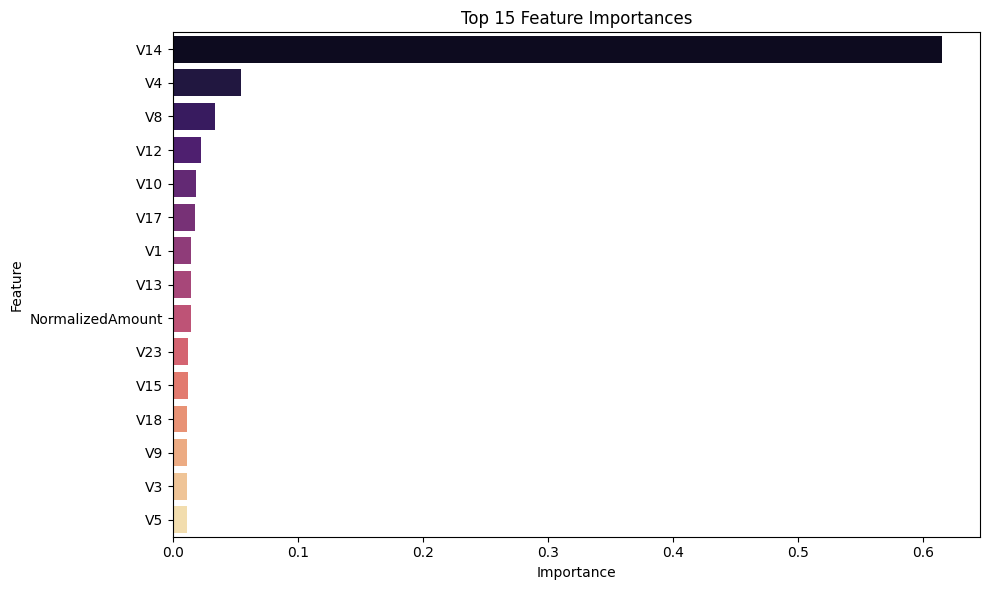

In [29]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
importance.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance.head(15), x='Importance', y='Feature', palette='magma')
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

# **VISUAL INSIGHTS**

***Distribution of Normalized Amount***

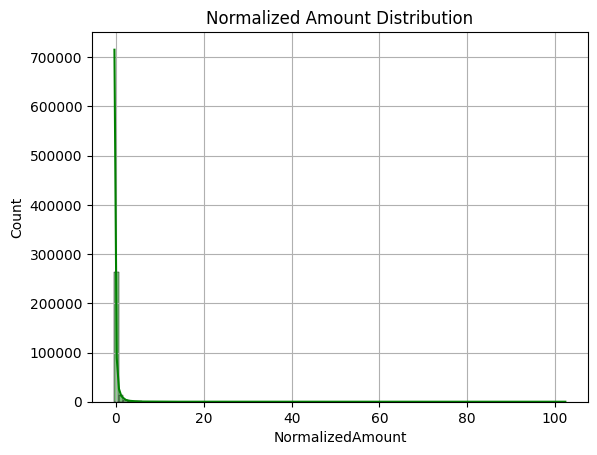

In [30]:
sns.histplot(credit_data['NormalizedAmount'], bins=100, kde=True, color='green')
plt.title("Normalized Amount Distribution")
plt.grid(True)
plt.show()

***Amount Distribution by Class***

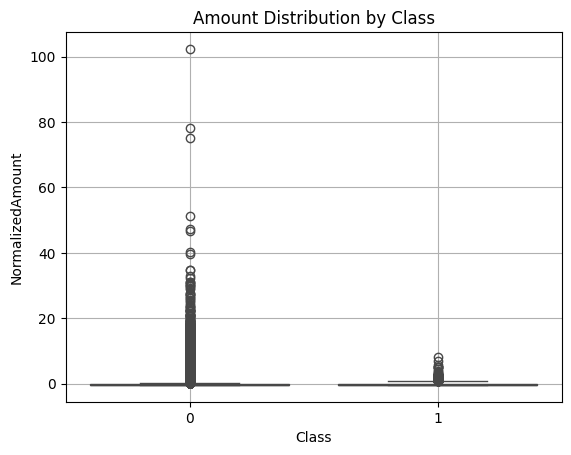

In [31]:
sns.boxplot(x='Class', y='NormalizedAmount', data=credit_data, palette='Set1')
plt.title("Amount Distribution by Class")
plt.grid(True)
plt.show()

***Most Correlated Features - Pairplot***

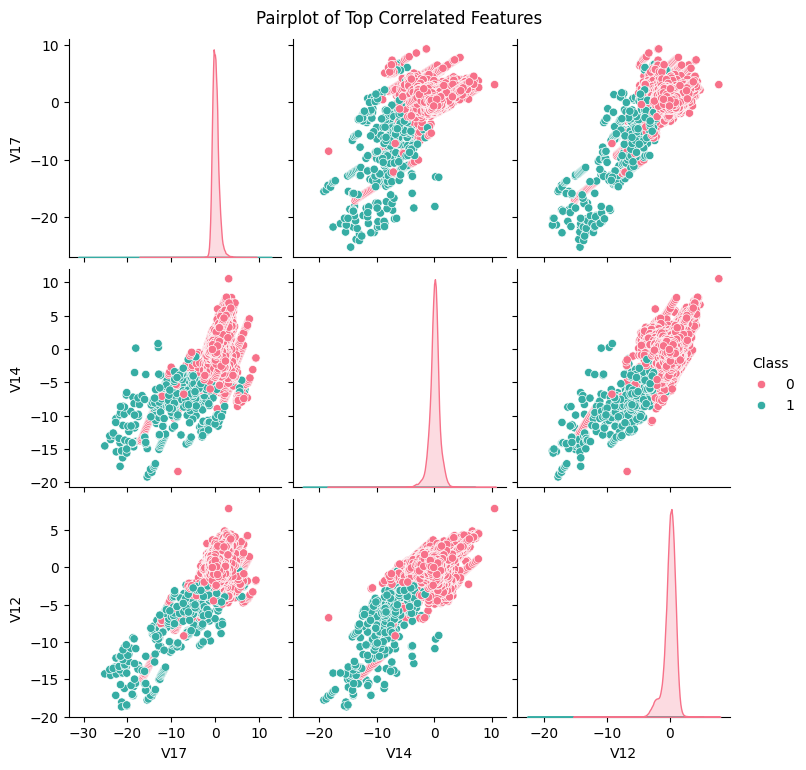

In [32]:
corr = credit_data.corr()['Class'].drop('Class').abs().sort_values(ascending=False)
top_corr_features = corr.head(3).index.tolist()
sns.pairplot(credit_data[top_corr_features + ['Class']], hue='Class', palette='husl')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

***Fraud Percentage in Dataset***

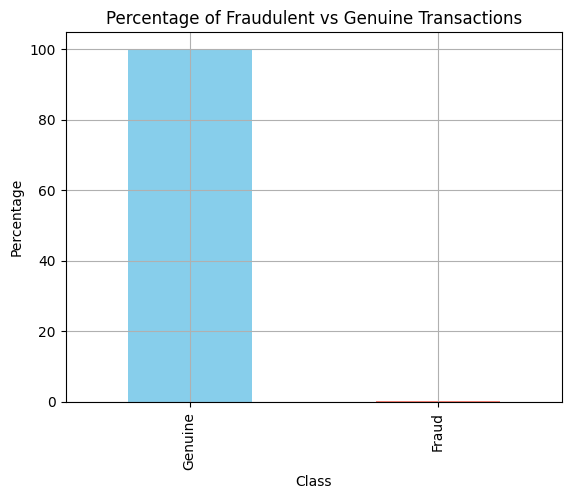

In [33]:
fraud_percent = credit_data['Class'].value_counts(normalize=True) * 100
fraud_percent.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Percentage of Fraudulent vs Genuine Transactions")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=['Genuine', 'Fraud'])
plt.grid(True)
plt.show()

***Class-wise Average Feature Values***

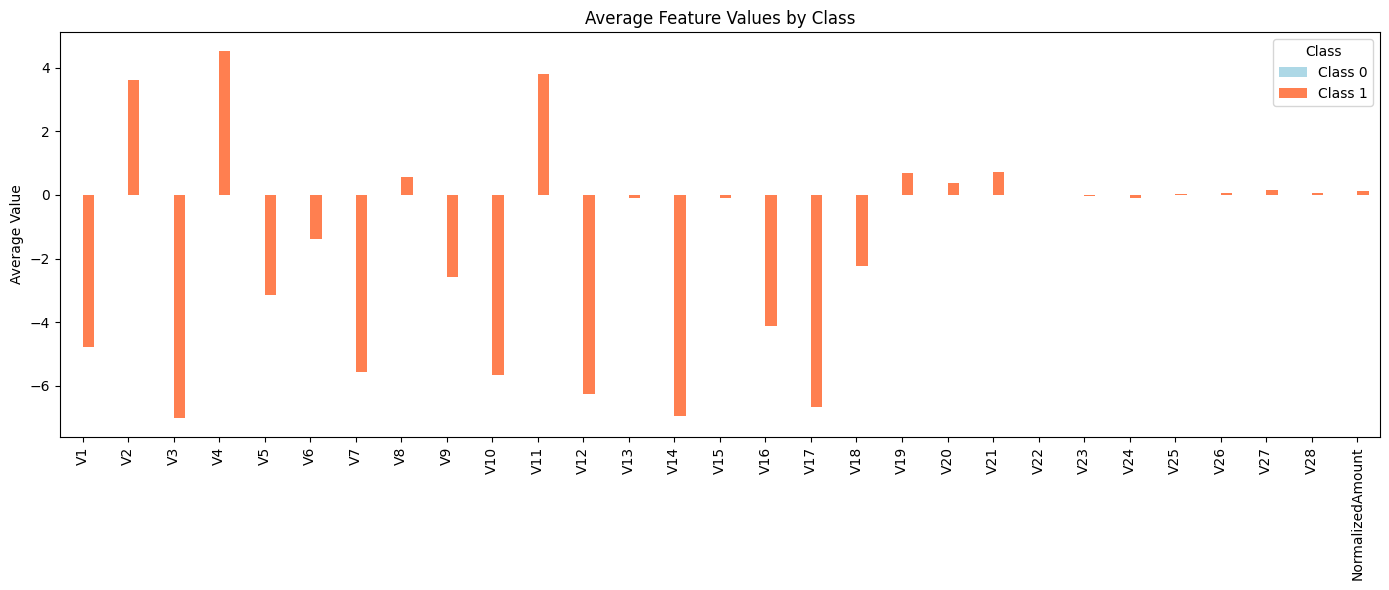

In [34]:
avg_by_class = credit_data.groupby('Class').mean().T
avg_by_class[['Class 0', 'Class 1']] = avg_by_class.iloc[:, [0, 1]]
avg_by_class[['Class 0', 'Class 1']].plot(kind='bar', figsize=(14, 6), color=['lightblue', 'coral'])
plt.title("Average Feature Values by Class")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()

***Boxplot of Important Features***

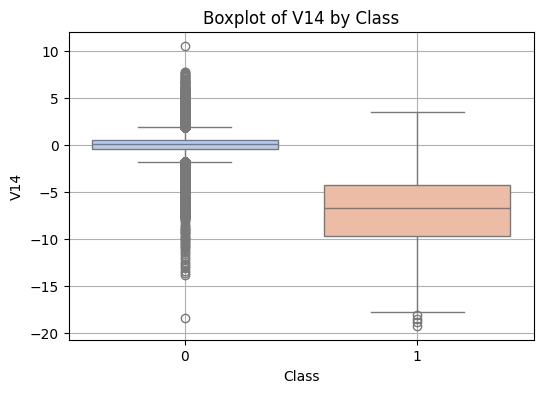

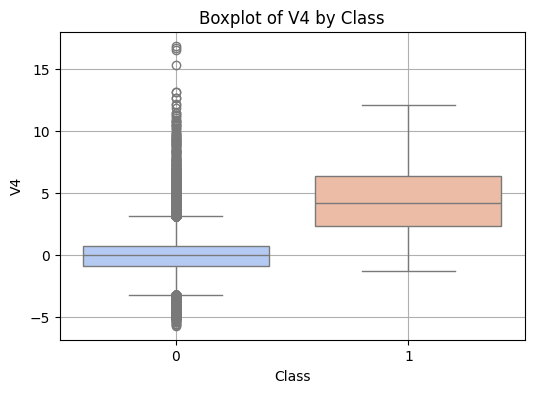

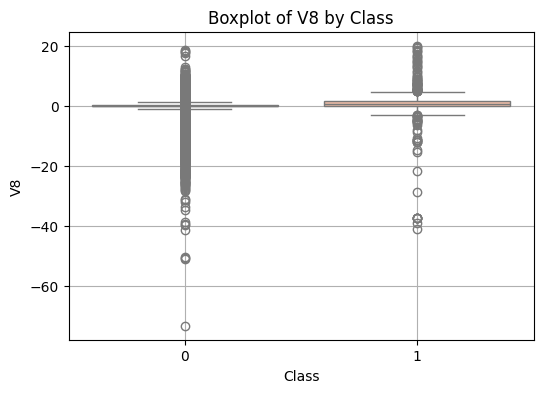

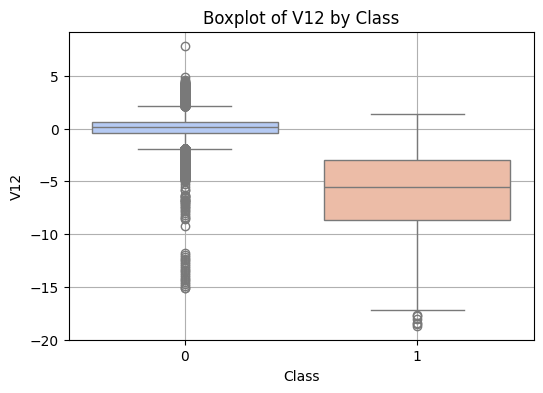

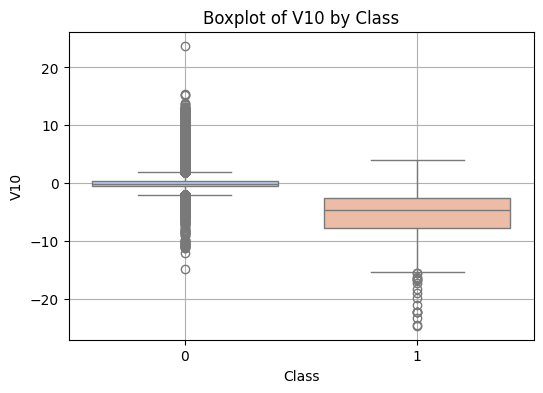

In [35]:
top_features = importance['Feature'].head(5).tolist()
for feat in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=feat, data=credit_data, palette='coolwarm')
    plt.title(f"Boxplot of {feat} by Class")
    plt.grid(True)
    plt.show()